# Adult Census Income EDA and Prediction

In this kernel I work with the UCI Adult Census Income dataset. The prediction task is to determine whether a person makes over $50K a year. I start with an exhaustive EDA, and I then train various models to solve the prediction task.

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline


import os
print(os.listdir("../input"))

data = pd.read_csv("../input/adult.csv")


['adult.csv']


## Exploratory Data Analysis

In [2]:
print(len(data))
data.head(10)

32561


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,>50K


In [3]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

Good.

In [4]:
data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

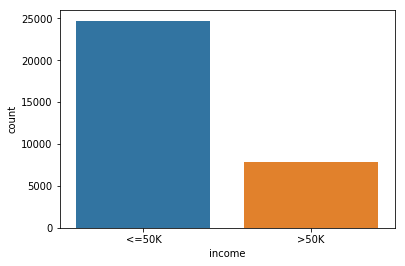

In [5]:
sns.countplot(data['income'])
plt.show()

### Distribution of features

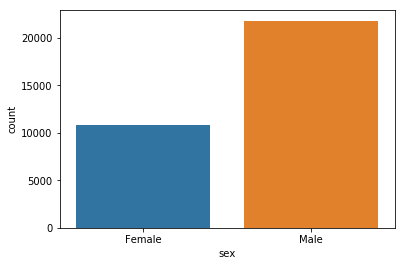

In [6]:
# Sex distribution
sns.countplot(data['sex'])
plt.show()

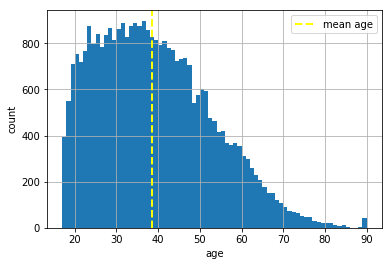

In [7]:
# Age distribution
ages = data['age'].hist(bins=max(data['age'])-min(data['age']))
mean_val = np.mean(data['age'])
plt.axvline(mean_val, linestyle='dashed', linewidth=2, color='yellow', label='mean age')
plt.xlabel('age')
plt.ylabel('count')
plt.legend()
plt.show()

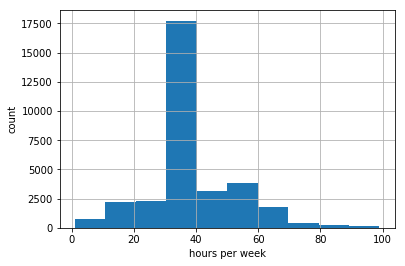

In [8]:
data['hours.per.week'].hist()
plt.xlabel('hours per week')
plt.ylabel('count')
plt.show()

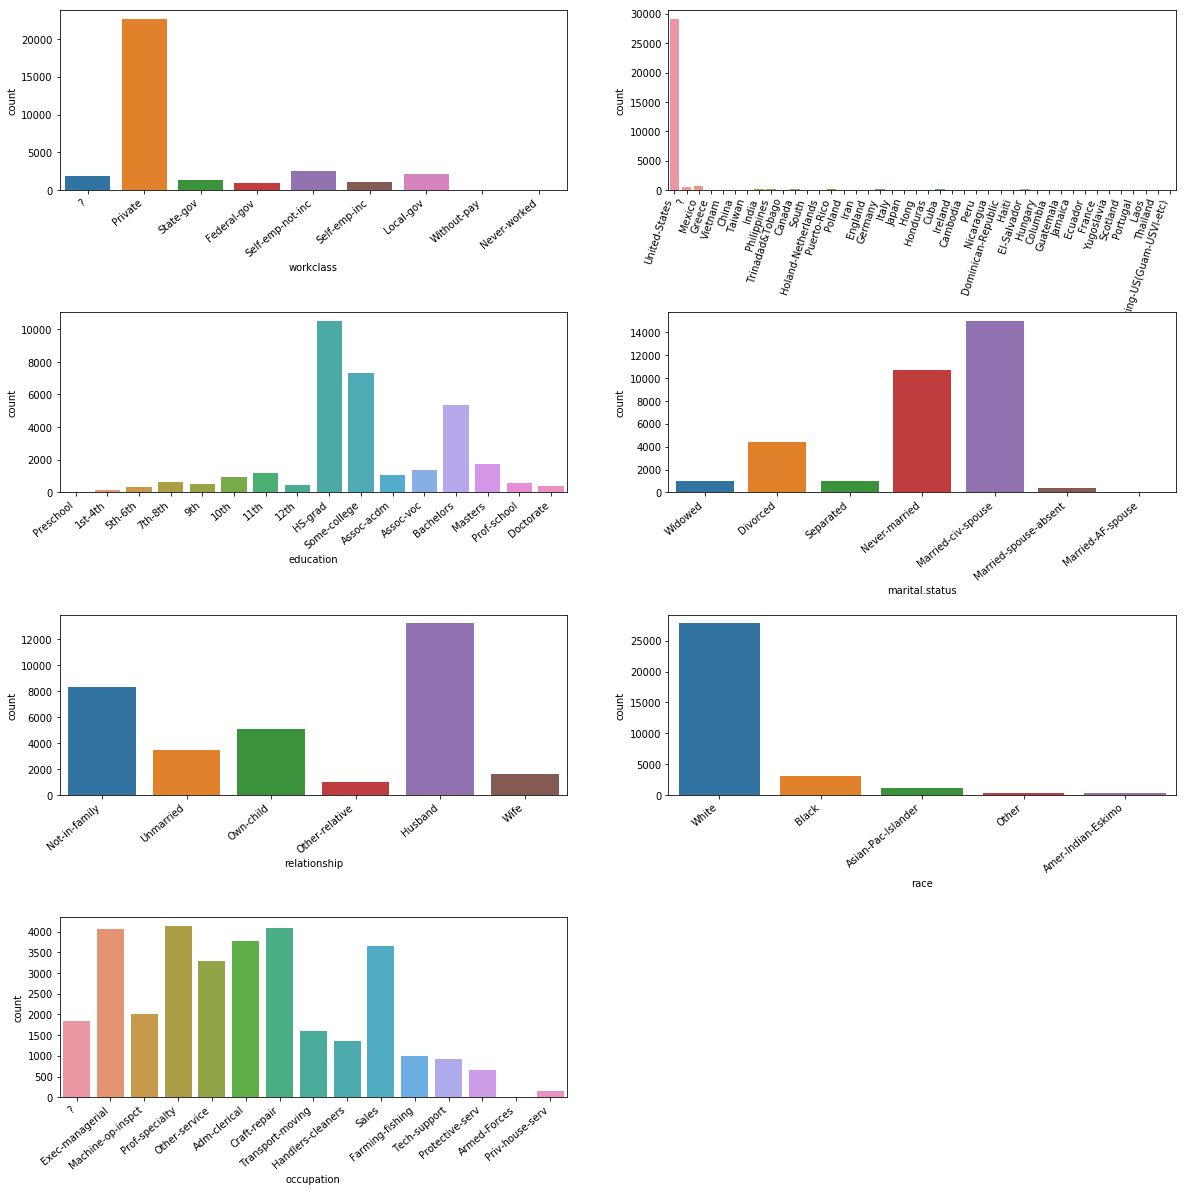

In [9]:
fig, axs = plt.subplots(ncols=2, nrows=4, figsize=(20, 20))
plt.subplots_adjust(hspace=0.68)
fig.delaxes(axs[3][1])


# Workclass
wc_plot = sns.countplot(data['workclass'], ax=axs[0][0])
wc_plot.set_xticklabels(wc_plot.get_xticklabels(), rotation=40, ha="right")

# Native country
nc_plot = sns.countplot(data['native.country'], ax=axs[0][1])
nc_plot.set_xticklabels(nc_plot.get_xticklabels(), rotation=72, ha="right")

# Education
order=['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 'HS-grad',
       'Some-college', 'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Masters', 'Prof-school', 'Doctorate']
ed_plot = sns.countplot(data['education'], order=order, ax=axs[1][0])
ed_plot.set_xticklabels(ed_plot.get_xticklabels(), rotation=40, ha="right")

# Marital status
ms_plot = sns.countplot(data['marital.status'], ax=axs[1][1])
ms_plot.set_xticklabels(ms_plot.get_xticklabels(), rotation=40, ha="right")

# Relationship
rel_plot = sns.countplot(data['relationship'], ax=axs[2][0])
rel_plot.set_xticklabels(rel_plot.get_xticklabels(), rotation=40, ha="right")

# Race
race_plot = sns.countplot(data['race'], ax=axs[2][1])
race_plot.set_xticklabels(race_plot.get_xticklabels(), rotation=40, ha="right")

# Occupation
occ_plot = sns.countplot(data['occupation'], ax=axs[3][0])
occ_plot.set_xticklabels(occ_plot.get_xticklabels(), rotation=40, ha="right")

plt.show()


### How do features relate to one another?

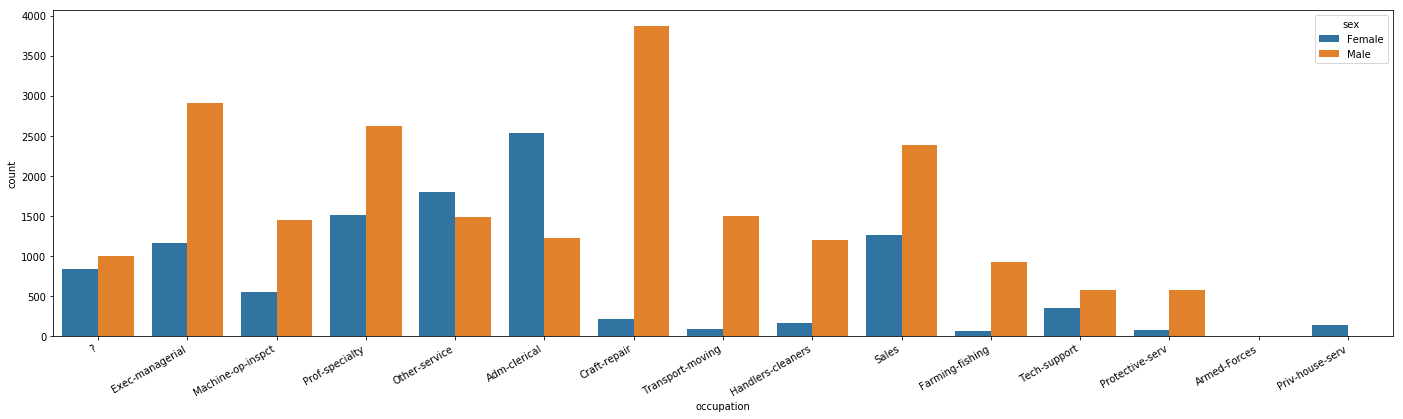

In [10]:
plt.figure(figsize=(24, 6))
ro = sns.countplot(data['occupation'], hue=data['sex'])
ro.set_xticklabels(ro.get_xticklabels(), rotation=30, ha="right")
plt.show()


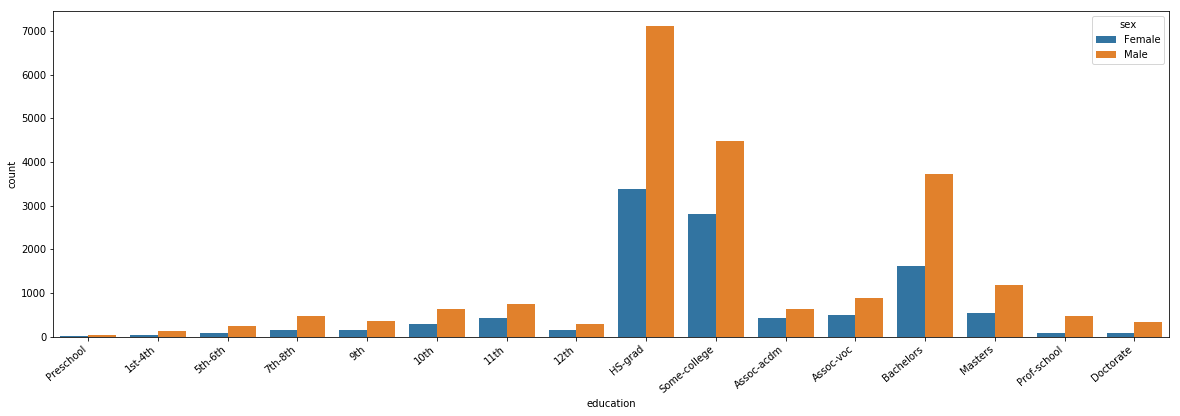

In [11]:
plt.figure(figsize=(20, 6))
ro = sns.countplot(data['education'], hue=data['sex'], order=order)
ro.set_xticklabels(ro.get_xticklabels(), rotation=40, ha="right")
#ro.set_yscale('log')
plt.show()

In [12]:
data['income'] = data['income'].map({'<=50K': 0, '>50K': 1}) 

### How do features relate to income?

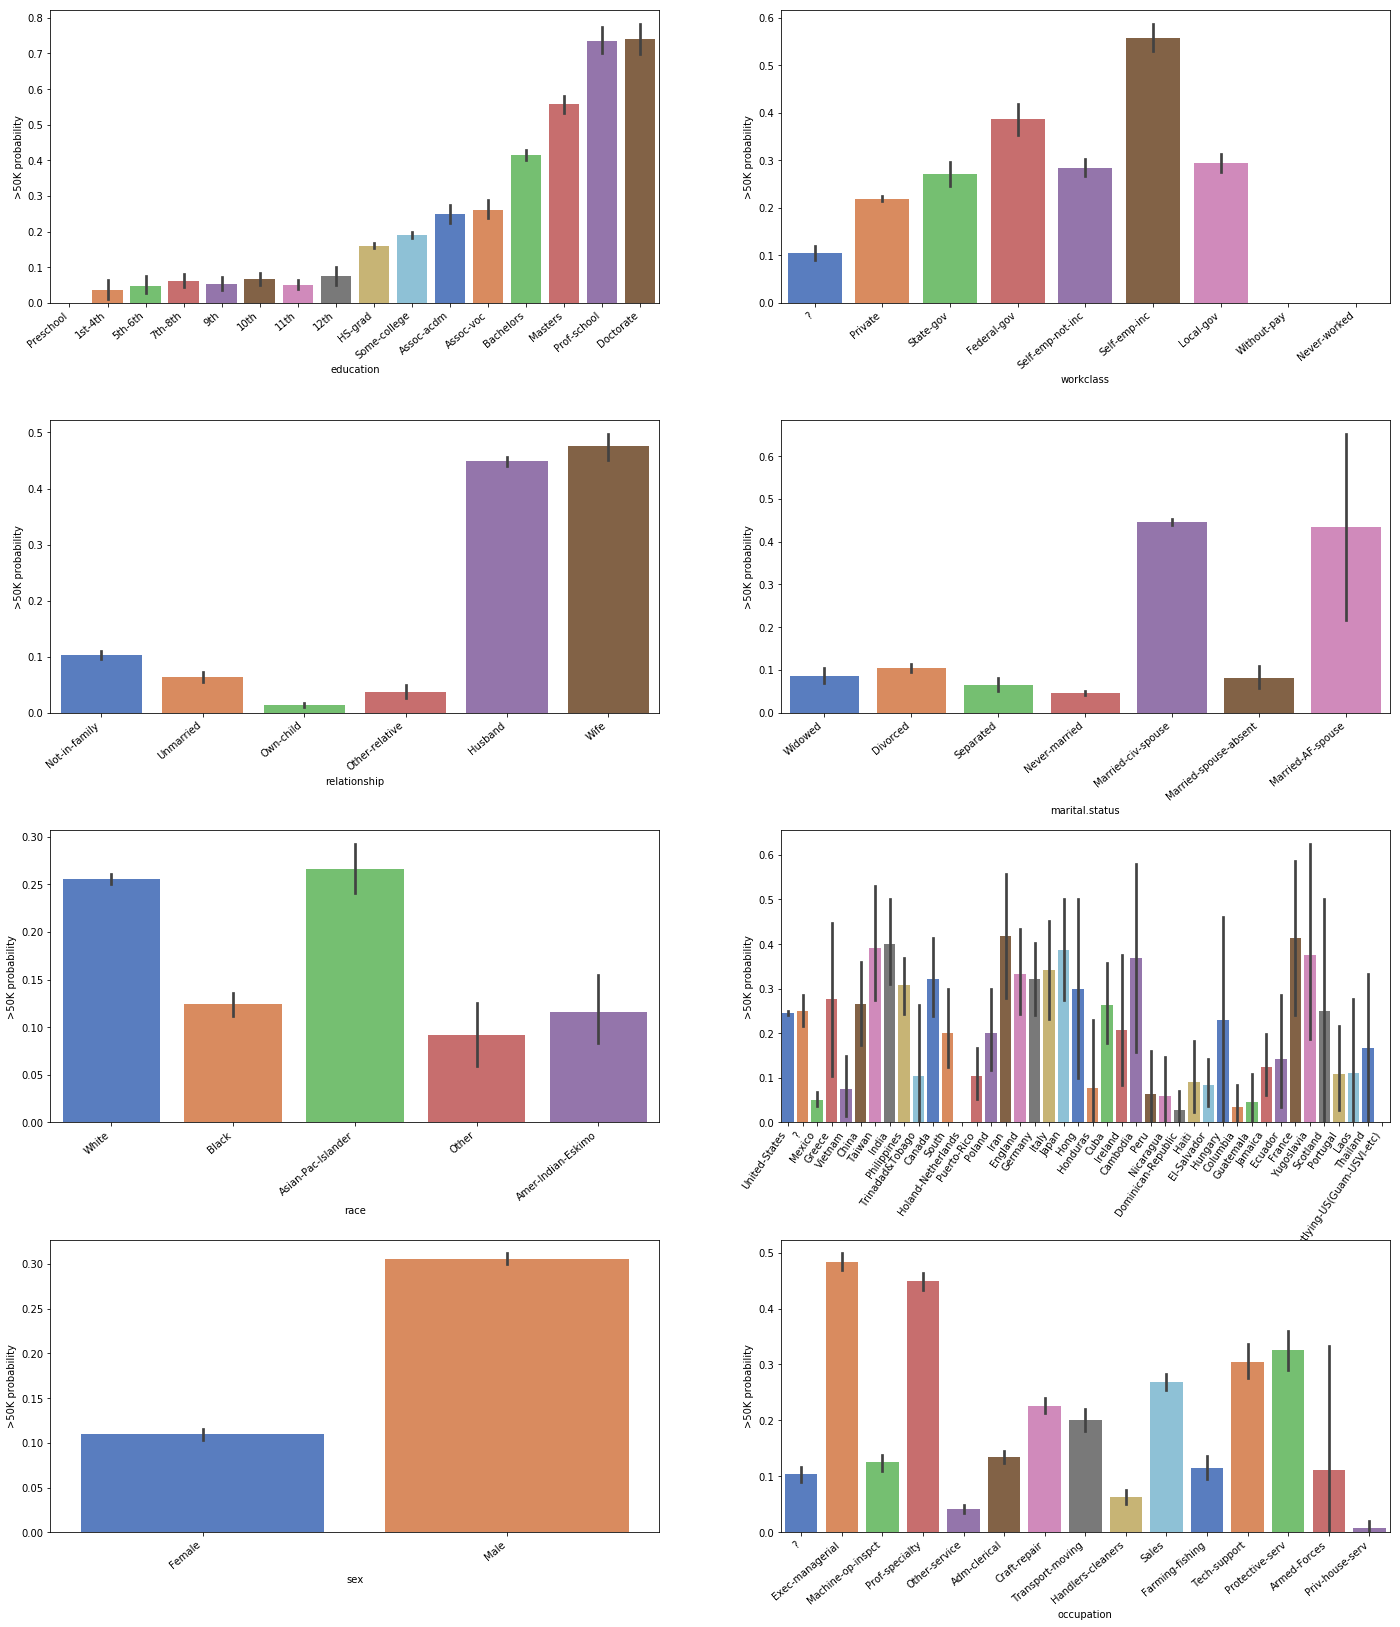

In [13]:
fig, axs = plt.subplots(ncols=2, nrows=4, figsize=(24, 28))
#fig.delaxes(axs[3][1])
plt.subplots_adjust(hspace=0.4)

# education and income
sns.catplot(x="education", y="income", data=data, kind="bar", height = 6, palette = "muted", order=order, ax=axs[0][0])
axs[0][0].set_xticklabels(axs[0][0].axes.get_xticklabels(), rotation=40, ha="right")
axs[0][0].set_ylabel(">50K probability")

sns.catplot(x="workclass", y="income", data=data, kind="bar", height = 6, palette = "muted", ax=axs[0][1])
axs[0][1].set_xticklabels(axs[0][1].axes.get_xticklabels(), rotation=40, ha="right")
axs[0][1].set_ylabel(">50K probability")


sns.catplot(x="relationship", y="income", data=data, kind="bar", height = 6, palette = "muted", ax=axs[1][0])
axs[1][0].set_xticklabels(axs[1][0].axes.get_xticklabels(), rotation=40, ha="right")
axs[1][0].set_ylabel(">50K probability")

sns.catplot(x="marital.status", y="income", data=data, kind="bar", height = 6, palette = "muted", ax=axs[1][1])
axs[1][1].set_xticklabels(axs[1][1].axes.get_xticklabels(), rotation=40, ha="right")
axs[1][1].set_ylabel(">50K probability")

sns.catplot(x="race", y="income", data=data, kind="bar", height = 6, palette = "muted", ax=axs[2][0])
axs[2][0].set_xticklabels(axs[2][0].axes.get_xticklabels(), rotation=40, ha="right")
axs[2][0].set_ylabel(">50K probability")

sns.catplot(x="native.country", y="income", data=data, kind="bar", height = 6, palette = "muted", ax=axs[2][1])
axs[2][1].set_xticklabels(axs[2][1].axes.get_xticklabels(), rotation=55, ha="right")
axs[2][1].set_ylabel(">50K probability")

sns.catplot(x="sex", y="income", data=data, kind="bar", height = 6, palette = "muted", ax=axs[3][0])
axs[3][0].set_xticklabels(axs[3][0].axes.get_xticklabels(), rotation=40, ha="right")
axs[3][0].set_ylabel(">50K probability")

sns.catplot(x="occupation", y="income", data=data, kind="bar", height = 6, palette = "muted", ax=axs[3][1])
axs[3][1].set_xticklabels(axs[3][1].axes.get_xticklabels(), rotation=40, ha="right")
axs[3][1].set_ylabel(">50K probability")

#ed_income.set_ylabels(">50K probability")

for i in range(2,10):
        plt.close(i)

plt.show()

#### Another way of visualizing this

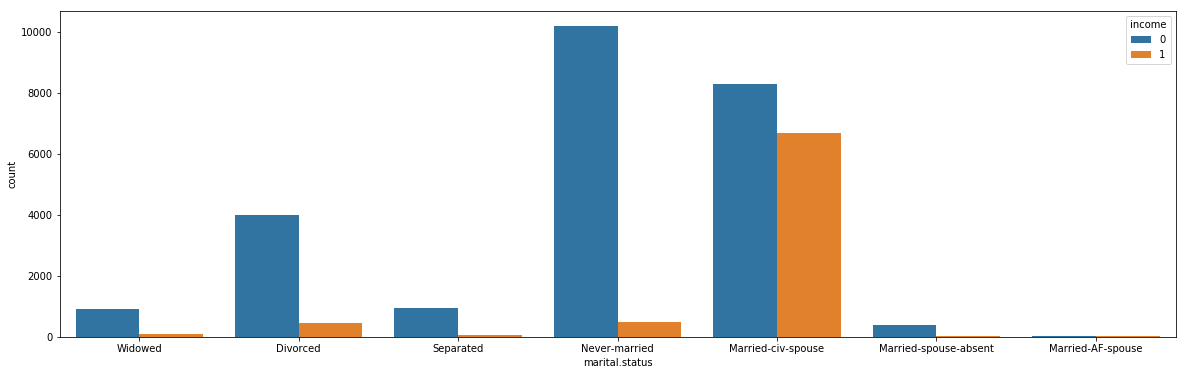

In [14]:
plt.figure(figsize=(20, 6))
sns.countplot(data['marital.status'], hue=data['income'])
plt.show()

## Data Preparation

Now the data needs to be prepared for prediction.

In [15]:
data['sex'] = data['sex'].map({'Male': 1, 'Female': 0}) 

In [16]:
data['race'] = data['race'].map({'White': 1, 'Asian-Pac-Islander': 1, 'Black':0, 'Amer-Indian-Eskimo':0, 'Other':0}) 
data['relationship'] = data['relationship'].map({'Not-in-family':0, 'Unmarried':0, 'Own-child':0, 'Other-relative':0, 'Husband':1, 'Wife':1})
data['marital.status'] = data['marital.status'].map({'Widowed':0, 'Divorced':0, 'Separated':0, 'Never-married':0, 'Married-civ-spouse':1, 'Married-AF-spouse':1, 'Married-spouse-absent':0})

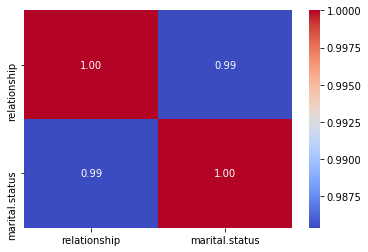

In [17]:
g = sns.heatmap(data[['relationship', 'marital.status']].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")
plt.show()

relationship and marital.status contain the same information now, so one of them can be removed

In [18]:
data.drop(['marital.status'], axis=1,inplace=True)

LabelEncoder can be used to transform the rest of the categorical features.

In [19]:
# data.drop(['workclass', 'education', 'occupation', 'native.country'], axis=1,inplace=True)

data.drop(['education'], axis=1,inplace=True)

labels = ['workclass', 'occupation', 'native.country']

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for l in labels:
    data[l]=le.fit_transform(data[l])



In [20]:
data.head(10)

,age,workclass,fnlwgt,education.num,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,0,77053,9,0,0,1,0,0,4356,40,39,0
1,82,4,132870,9,4,0,1,0,0,4356,18,39,0
2,66,0,186061,10,0,0,0,0,0,4356,40,39,0
3,54,4,140359,4,7,0,1,0,0,3900,40,39,0
4,41,4,264663,10,10,0,1,0,0,3900,40,39,0
5,34,4,216864,9,8,0,1,0,0,3770,45,39,0
6,38,4,150601,6,1,0,1,1,0,3770,40,39,0
7,74,7,88638,16,10,0,1,0,0,3683,20,39,1
8,68,1,422013,9,10,0,1,0,0,3683,40,39,0
9,41,4,70037,10,3,0,1,1,0,3004,60,0,1


The dataset is ready.

## Prediction

#### Importing the relevant libraries

In [21]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, StratifiedKFold, learning_curve, train_test_split, KFold
# from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.svm import SVC

#### Preparing data for training and testing with k-fold Cross-Validation

In [22]:
seed = 42

from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(data.loc[:, data.columns != 'income'])
Y = data['income']

# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

kf = KFold(n_splits=10, shuffle=True, random_state=seed)


In [23]:
a = len(data.loc[data.income==0])/len(data)
print(a)

0.7591904425539756


One would get a 76% accuracy by just always predicting <=50k. Our model has to do better than that or it's not learning anything.

### Starting with some simple models

LogisticRegression
Accuracy score: 0.8425 

KNeighborsClassifier
Accuracy score: 0.8412 

LinearDiscriminantAnalysis
Accuracy score: 0.8331 

GaussianNB
Accuracy score: 0.8033 



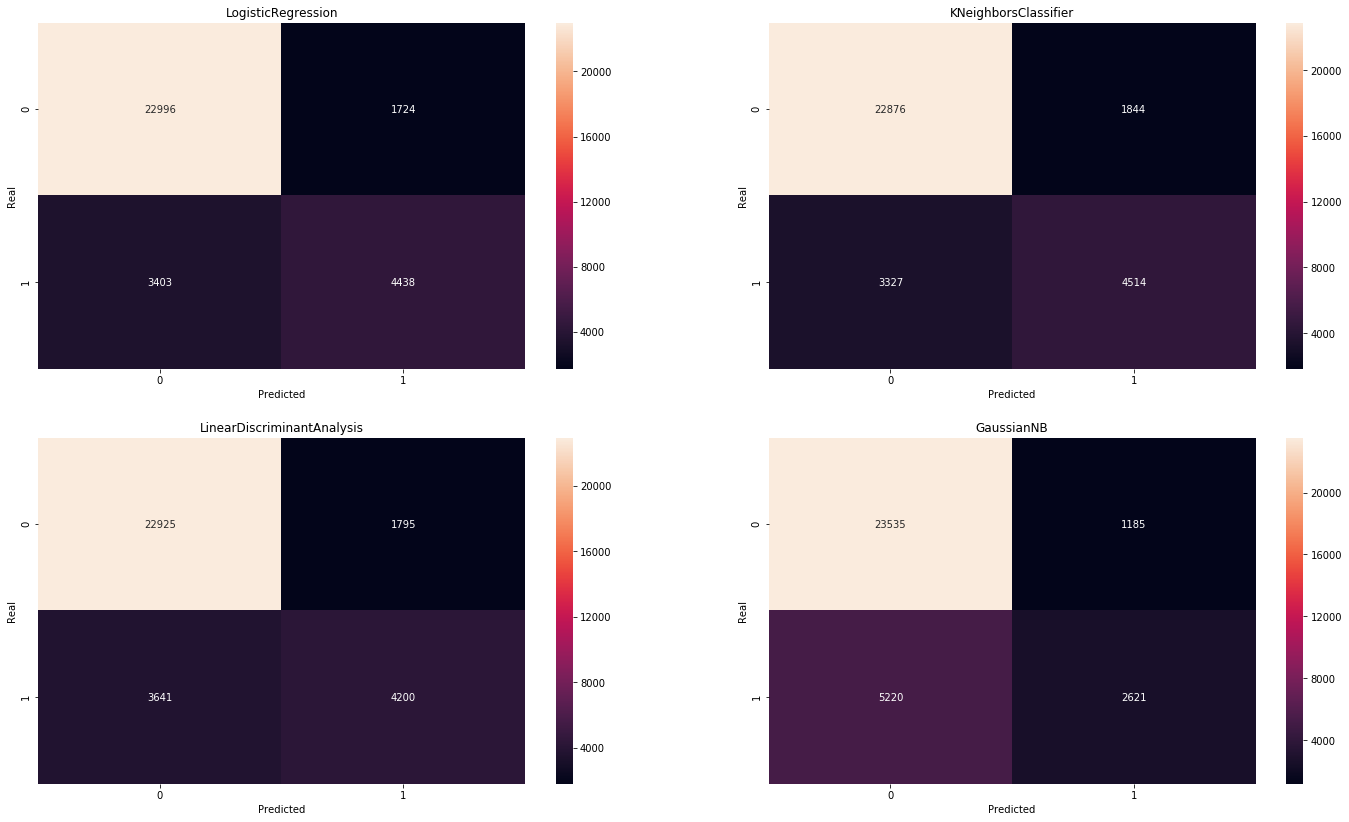

In [24]:

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(24, 14))


classifiers = [
    LogisticRegression(solver='newton-cg'),
    KNeighborsClassifier(n_neighbors=17), # Some trial and error I don't show went into this hyperpa
    LinearDiscriminantAnalysis(),
    GaussianNB()
]


for i, c in enumerate(classifiers):
    
    x_axs = i%2
    y_axs = int(i/2)
    # print(c)
    print(type(c).__name__)
    pred = cross_val_predict(c, X, Y, cv=kf)
    print("Accuracy score:", round(accuracy_score(Y, pred), 4), '\n')

    sns.heatmap(confusion_matrix(Y, pred), annot=True, fmt='g', ax=axs[y_axs][x_axs])
    axs[y_axs][x_axs].set_xlabel('Predicted')
    axs[y_axs][x_axs].set_ylabel('Real')
    axs[y_axs][x_axs].set_title(type(c).__name__)

plt.show()

Logistic regression performs best with 84.25% accuracy. 


### More complex models

DecisionTreeClassifier
Accuracy score: 0.8139 

BaggingClassifier
Accuracy score: 0.8467 

RandomForestClassifier
Accuracy score: 0.8528 

ExtraTreesClassifier
Accuracy score: 0.8431 

GradientBoostingClassifier
Accuracy score: 0.8658 

AdaBoostClassifier
Accuracy score: 0.8604 



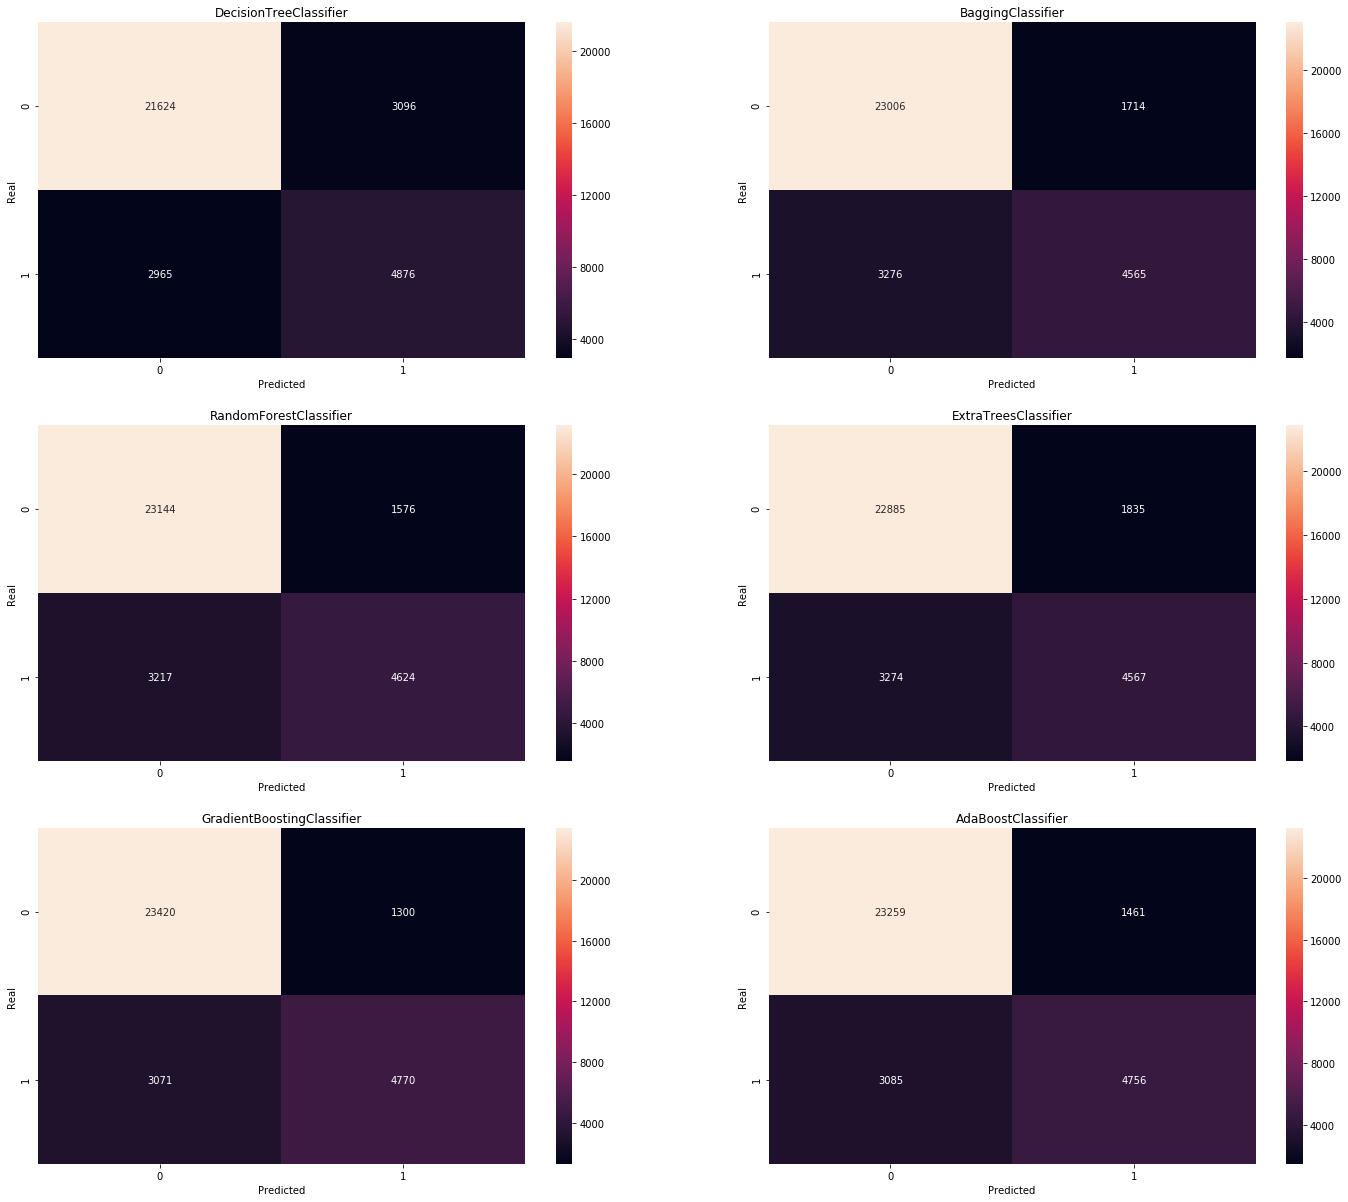

In [25]:
import warnings
warnings.filterwarnings(action='ignore')
fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(24, 21))

classifiers = [
    DecisionTreeClassifier(),
    BaggingClassifier(),
    RandomForestClassifier(),
    ExtraTreesClassifier(),
    GradientBoostingClassifier(),
    AdaBoostClassifier()
]


for i, c in enumerate(classifiers):
    
    x_axs = i%2
    y_axs = int(i/2)
    
    # print(c)
    print(type(c).__name__)
    pred = cross_val_predict(c, X, Y, cv=kf)
    print("Accuracy score:", round(accuracy_score(Y, pred), 4), '\n')
    
    sns.heatmap(confusion_matrix(Y, pred), annot=True, fmt='g', ax=axs[y_axs][x_axs])
    axs[y_axs][x_axs].set_xlabel('Predicted')
    axs[y_axs][x_axs].set_ylabel('Real')
    axs[y_axs][x_axs].set_title(type(c).__name__)

plt.show()

Gradient Boosting with no hyperparameter tuning gets to 86.58% accuracy. Not bad. Let's see if we can do better.

### Model Tuning

GridSearchCV allows to try out a lot of hyperparameters at once.

In [26]:
'''
# This takes about 2 hours to run
params = {'max_depth': [5, 6, 7], 
         'n_estimators': [100, 150, 200],
          'learning_rate': [0.1, 0.07, 0.05],
          'max_features': ['sqrt', 'log2', 3, 4, 5]
         }
'''


params = {'max_depth': [6], 
         'n_estimators': [200],
          'learning_rate': [0.07, 0.06],
          'max_features': [3,4]
         }

classifier = GradientBoostingClassifier()

grid = GridSearchCV(classifier, param_grid=params, cv=kf)
search_result = grid.fit(X, Y)


In [27]:
# GridSearch results
means = search_result.cv_results_['mean_test_score']
params = search_result.cv_results_['params']
for m, p in zip(means, params):
    print(f"{m} with: {p}")

0.8733454132244096 with: {'learning_rate': 0.07, 'max_depth': 6, 'max_features': 3, 'n_estimators': 200}
0.8740517797364946 with: {'learning_rate': 0.07, 'max_depth': 6, 'max_features': 4, 'n_estimators': 200}
0.8722397960750591 with: {'learning_rate': 0.06, 'max_depth': 6, 'max_features': 3, 'n_estimators': 200}
0.8733147016369276 with: {'learning_rate': 0.06, 'max_depth': 6, 'max_features': 4, 'n_estimators': 200}


GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.07, loss='deviance', max_depth=6,
                           max_features=4, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
Accuracy score: 0.8735 



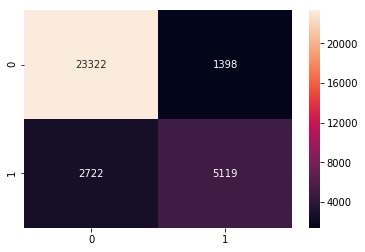

In [28]:
p = np.argmax(means)
best_param = params[p]

final_model = GradientBoostingClassifier(**best_param)

print(final_model)
pred = cross_val_predict(final_model, X, Y, cv=kf)
print("Accuracy score:", round(accuracy_score(Y, pred), 4), '\n')

sns.heatmap(confusion_matrix(Y, pred), annot=True, fmt='g')
plt.show()


Final prediction accuracy: 87.35%